In [5]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt, seaborn as sns
# Importing all other packages from statsmodel and scikit learn 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [7]:
# Importing all datasets
lead_data = pd.read_csv(r'C:\Users\Rishi Sachdev\Downloads\Lead Scoring Assignment\Leads.csv')

In [8]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
lead_data.shape

(9240, 37)

In [12]:
# Converting the select values to Null 
lead_data = lead_data.replace('Select', np.nan)

In [13]:
# checking missing values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# checking the percentage of null values 
round(lead_data.isnull().sum()/lead_data.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
How did you hear about X Education               0.78
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [15]:
# Determine columns with greater than 30% missing values
cols_drop = list(lead_data.columns[round(lead_data.isnull().sum()/lead_data.shape[0],2) > 0.3])

In [16]:
cols_drop

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [17]:
# Drop the columns with missing data
lead_data.drop(columns = cols_drop, inplace=True)

In [18]:
# Checking the null value percentage after the drop
round(lead_data.isnull().sum()/lead_data.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

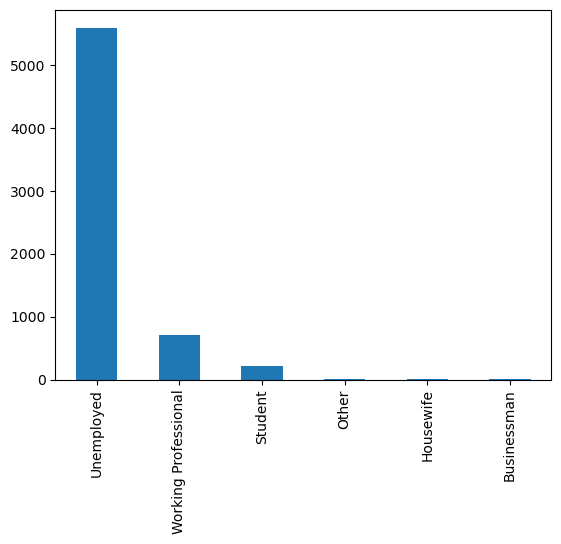

In [19]:
# Plotting the Valuecounts to treat missing values
lead_data['What is your current occupation'].value_counts().plot.bar()
plt.show()

In [20]:
# replacing missing values for What is your current occupation as Unemployed 
lead_data['What is your current occupation'].fillna('Unemployed', inplace=True)

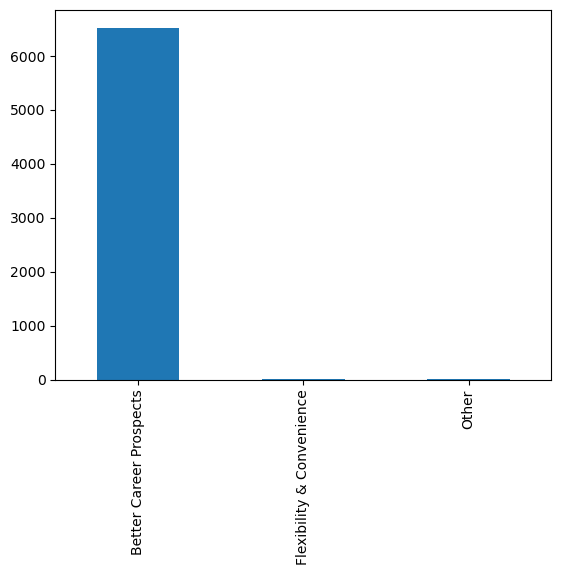

In [21]:
lead_data['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()

In [22]:
# replacing missing values for What matters most to you in choosing a course as Better Career Prospects
lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

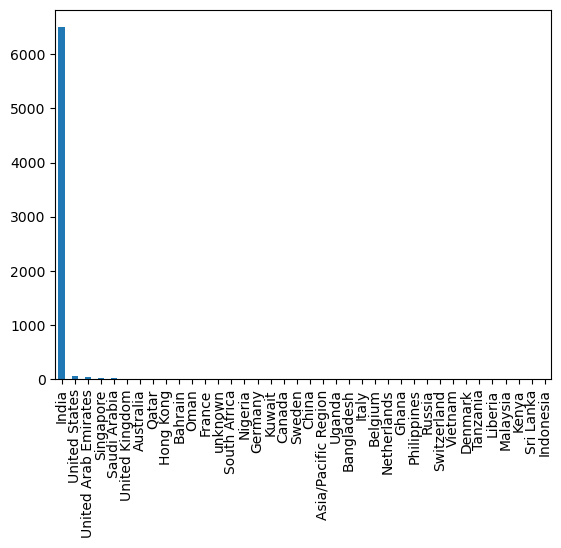

In [23]:
lead_data['Country'].value_counts().plot.bar()
plt.show()

In [24]:
# replacing missing values for Country as India
lead_data['Country'].fillna('India', inplace= True)

In [25]:
round(lead_data.isnull().sum()/lead_data.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [26]:
# Dropping the other rows with null values since they are less than 2 % 
lead_data = lead_data.dropna()

In [27]:
# Checking the % of null values after the treatment above
round(lead_data.isnull().sum()/lead_data.shape[0],2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

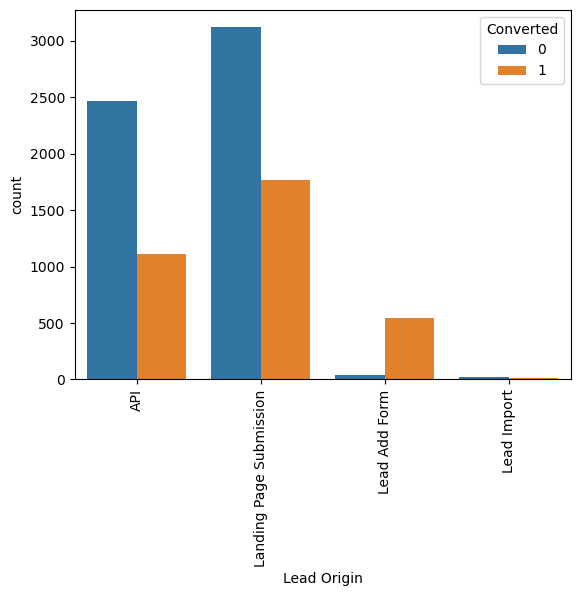

In [28]:
# Analyzing the different columns of the data
sns.countplot(x=lead_data['Lead Origin'], hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [87]:
# Defining a function to analyze the various categorical variables 
def ana(col):
    sns.countplot(x=lead_data[col], hue=lead_data.Converted)
    plt.xticks(rotation=90)
    plt.show()

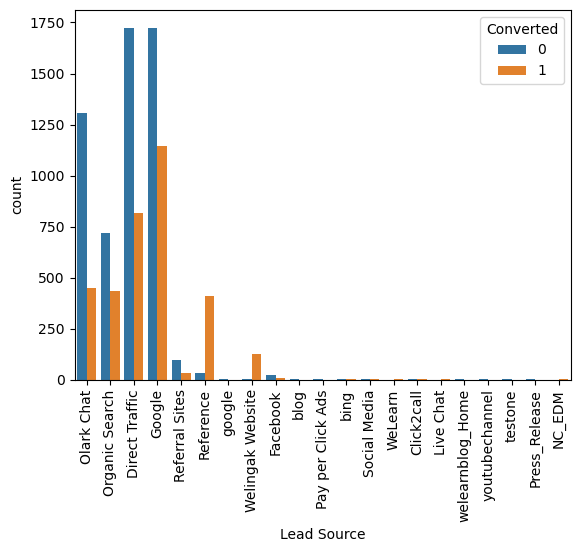

In [88]:
ana('Lead Source')

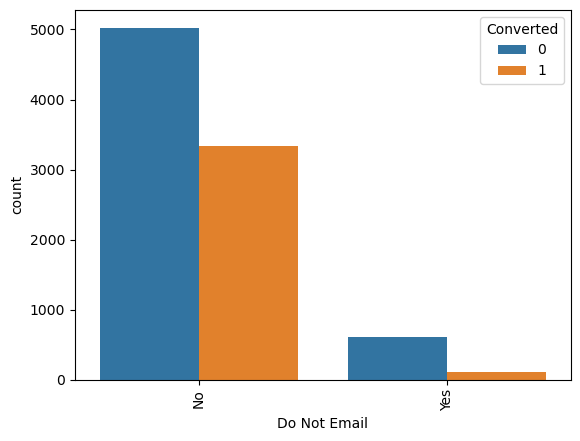

In [89]:
ana('Do Not Email')

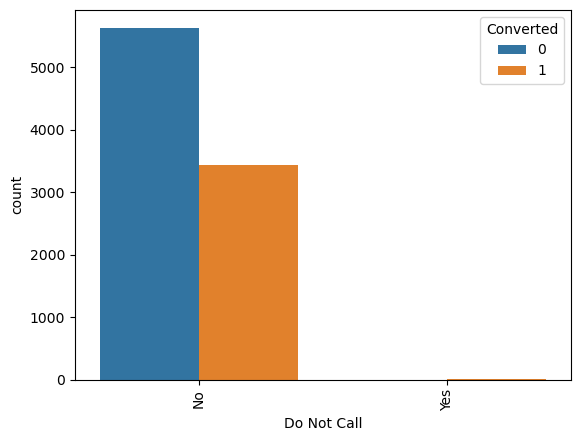

In [90]:
ana('Do Not Call')

In [91]:
# Since Do not call has imbalance data dropping it
col_2_drop = ['Do Not Call']

In [93]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

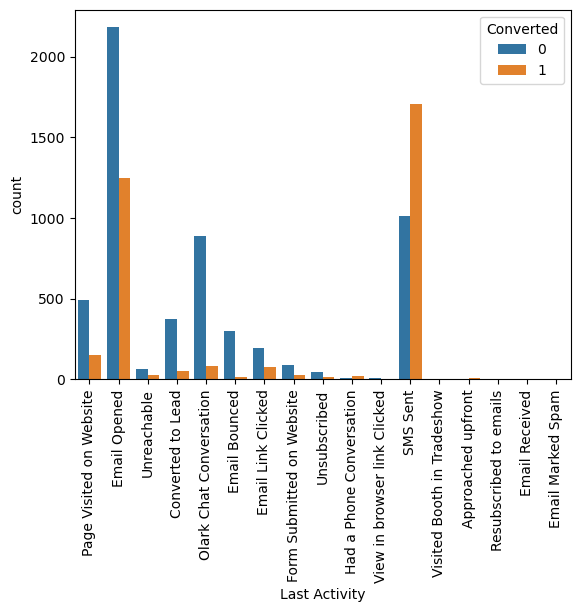

In [94]:
ana('Last Activity')

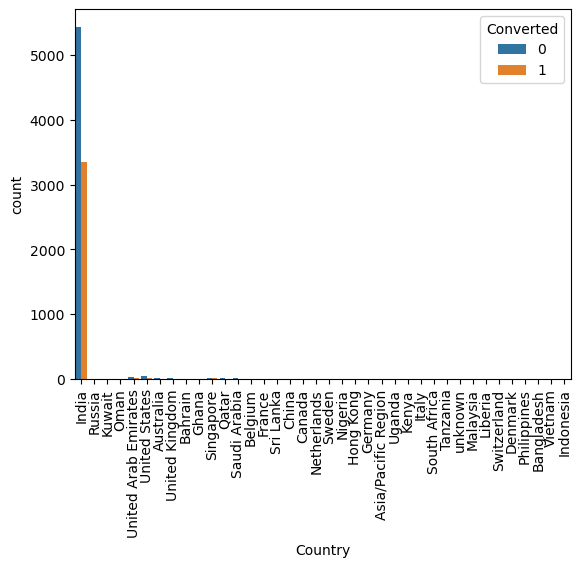

In [95]:
ana('Country')

In [97]:
# Since India is the coountry for most of the prospects, hence dropping it as unecessary for model building
col_2_drop.append('Country')

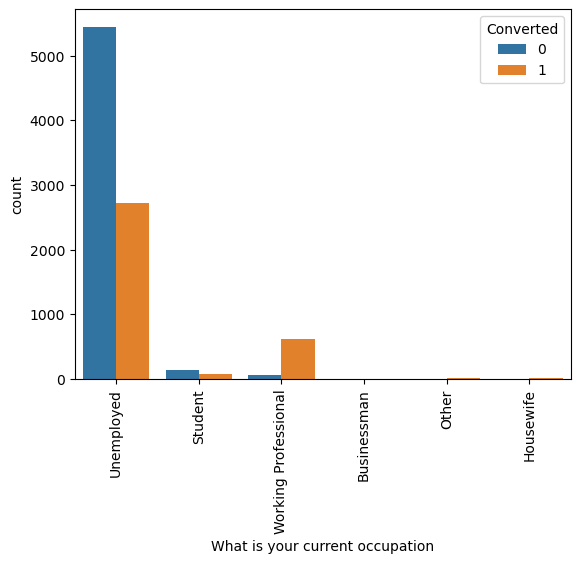

In [98]:
ana('What is your current occupation')

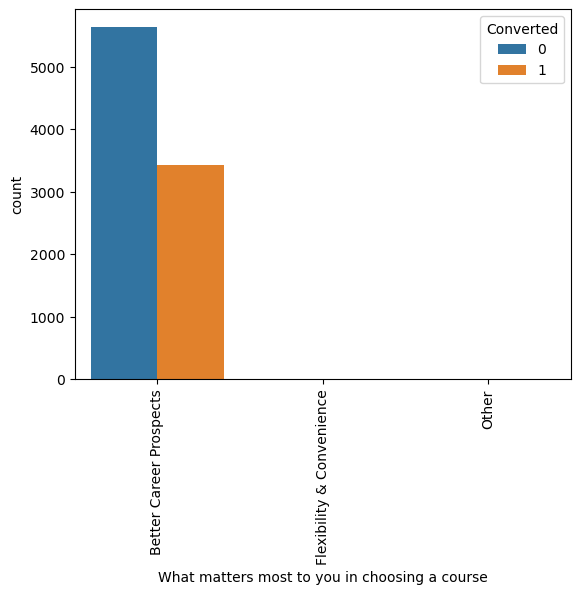

In [99]:
ana('What matters most to you in choosing a course')

In [100]:
# Since most of the propects have the data as Better Career Prospects hence dropping it
col_2_drop.append('What matters most to you in choosing a course')

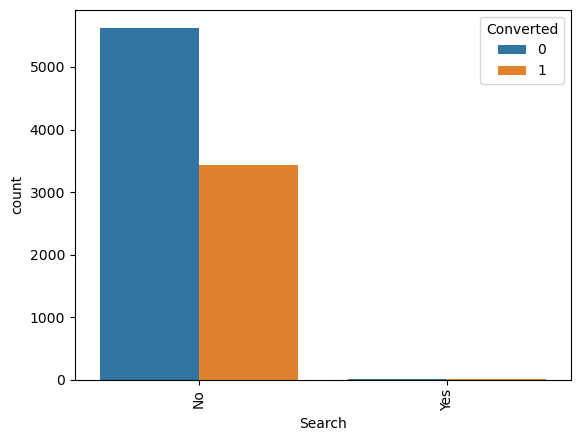

In [101]:
ana('Search')

In [102]:
lead_data.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [103]:
# Imbalance column that can be dropped
col_2_drop.append('Search')

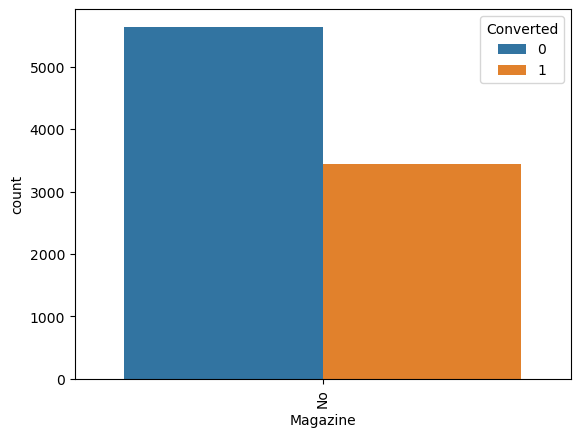

In [104]:
ana('Magazine')

In [105]:
lead_data.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

In [106]:
# Imbalance column that can be dropped
col_2_drop.append('Magazine')

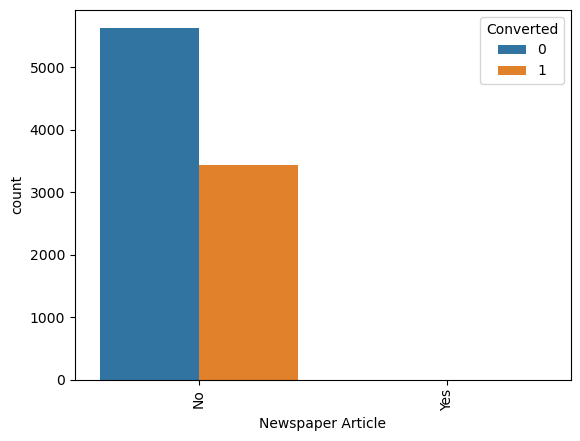

In [107]:
ana('Newspaper Article')

In [108]:
# Imbalance column that can be dropped
col_2_drop.append('Newspaper Article')

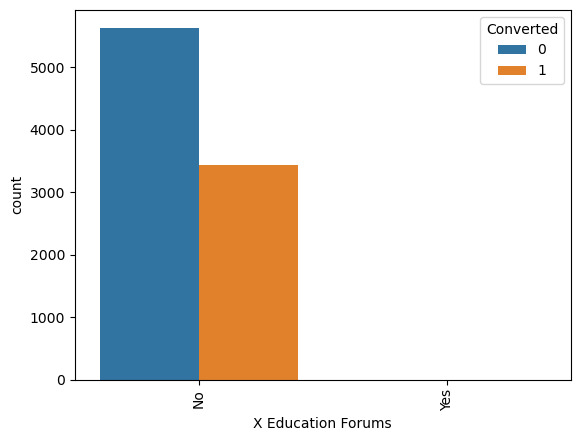

In [109]:
ana('X Education Forums')

In [111]:
# Imbalance column that can be dropped
col_2_drop.append('X Education Forums')

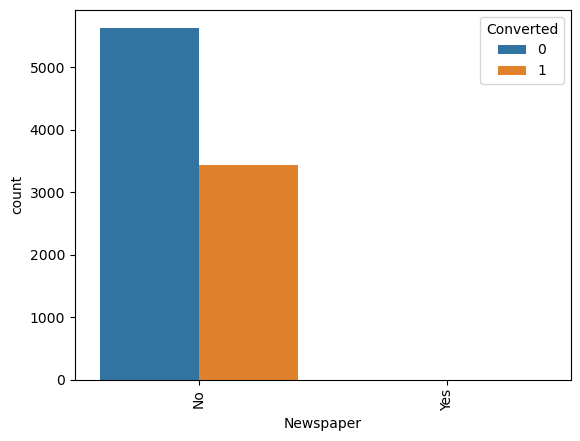

In [112]:
ana('Newspaper')

In [113]:
# Imbalance column that can be dropped
col_2_drop.append('Newspaper')

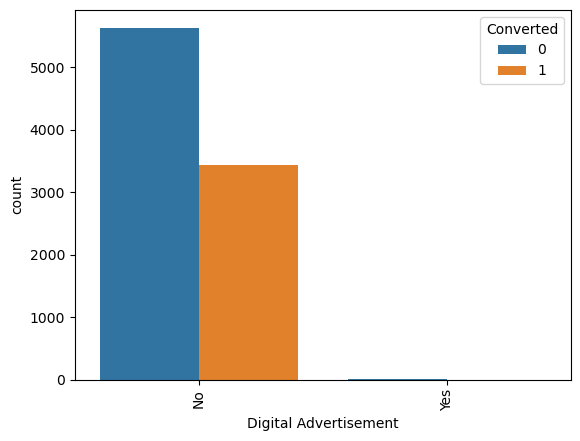

In [114]:
ana('Digital Advertisement')

In [115]:
lead_data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [116]:
# Imbalance column that can be dropped
col_2_drop.append('Digital Advertisement')

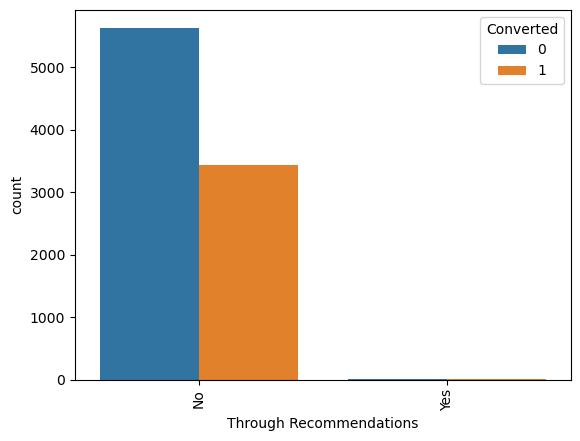

In [117]:
ana('Through Recommendations')

In [118]:
# Imbalance column that can be dropped
col_2_drop.append('Through Recommendations')

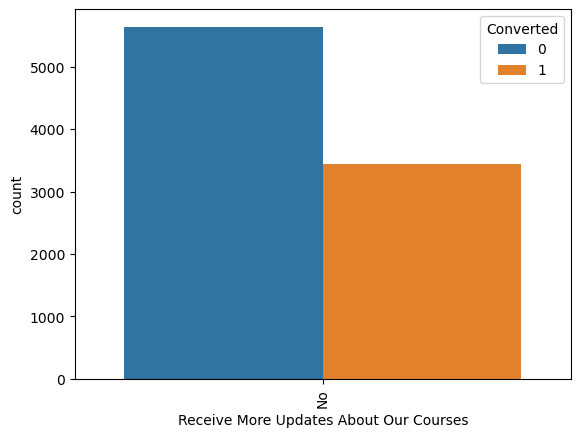

In [119]:
ana('Receive More Updates About Our Courses')

In [120]:
# Imbalance column that can be dropped
col_2_drop.append('Receive More Updates About Our Courses')

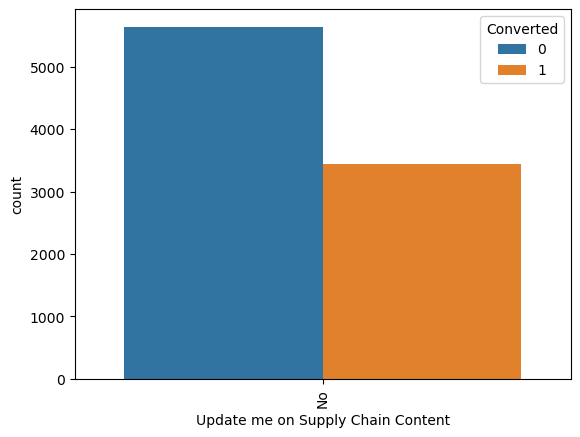

In [121]:
ana('Update me on Supply Chain Content')

In [123]:
# Imbalance column that can be dropped
col_2_drop.append('Update me on Supply Chain Content')

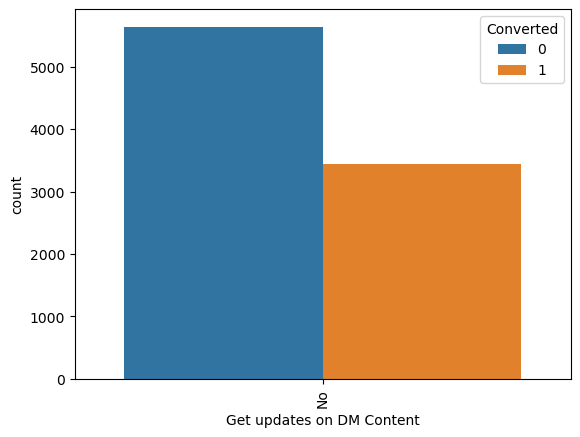

In [124]:
ana('Get updates on DM Content')

In [125]:
# Imbalance column that can be dropped
col_2_drop.append('Get updates on DM Content')

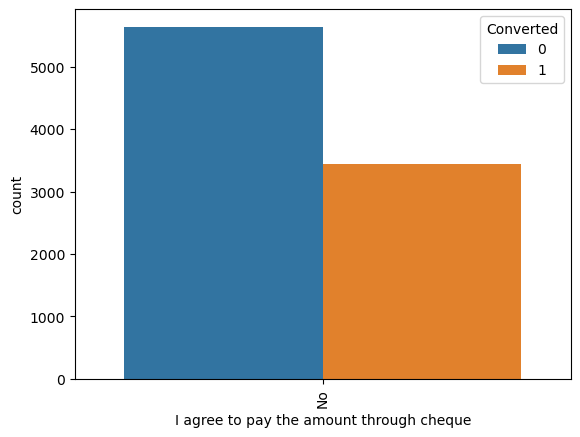

In [126]:
ana('I agree to pay the amount through cheque')

In [127]:
# Imbalance column that can be dropped
col_2_drop.append('I agree to pay the amount through cheque')

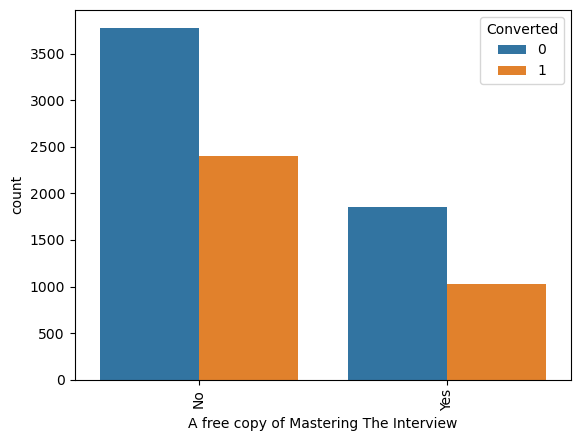

In [128]:
ana('A free copy of Mastering The Interview')

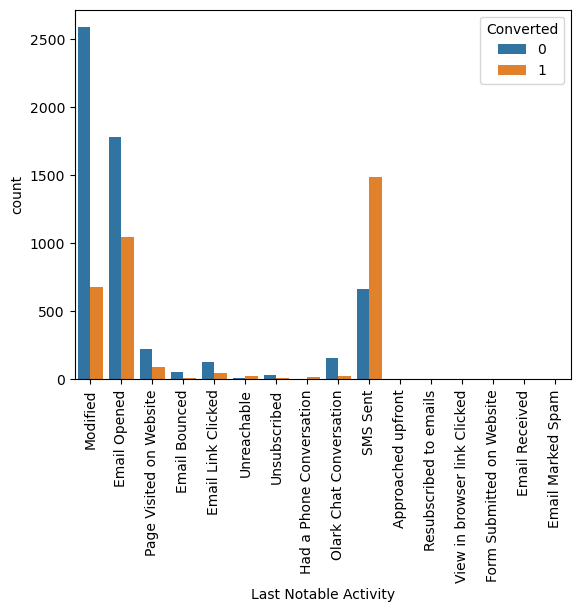

In [129]:
ana('Last Notable Activity')

In [130]:
col_2_drop

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [131]:
# Dropping all the columns that are unnecessary 
lead_data.drop(columns=col_2_drop,inplace=True)

In [132]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [133]:
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [148]:
lsd = lead_data['Lead Source'].value_counts()

In [152]:
# collecting all the levels where the count is less than 100
l_lsd= lsd[lsd < 100].index.tolist()

In [153]:
# Clubbing the insignificant levels as Other
lead_data['Lead Source'] = lead_data['Lead Source'].replace(l_lsd, 'Other Sources')

In [154]:
lead_data['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other Sources         59
Name: Lead Source, dtype: int64

In [155]:
lead_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [156]:
lead_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [157]:
lad = lead_data['Last Activity'].value_counts()

In [161]:
# collecting all the levels where the count is less than 100
l_lad = lad[lad<100].index.tolist()

In [163]:
# Clubbing the insignificant levels as Other
lead_data['Last Activity'] = lead_data['Last Activity'].replace(l_lad, 'Other Activity')

In [164]:
lead_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other Activity                191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [165]:
lead_data['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [167]:
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [168]:
lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [169]:
lnad = lead_data['Last Notable Activity'].value_counts()

In [172]:
# collecting all the levels where the count is less than 100
l_lnad=lnad[lnad <100].index.tolist()

In [174]:
# Clubbing the insignificant levels as Other
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(l_lnad, 'Other LNA')

In [175]:
lead_data['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other LNA                   158
Name: Last Notable Activity, dtype: int64

<Axes: >

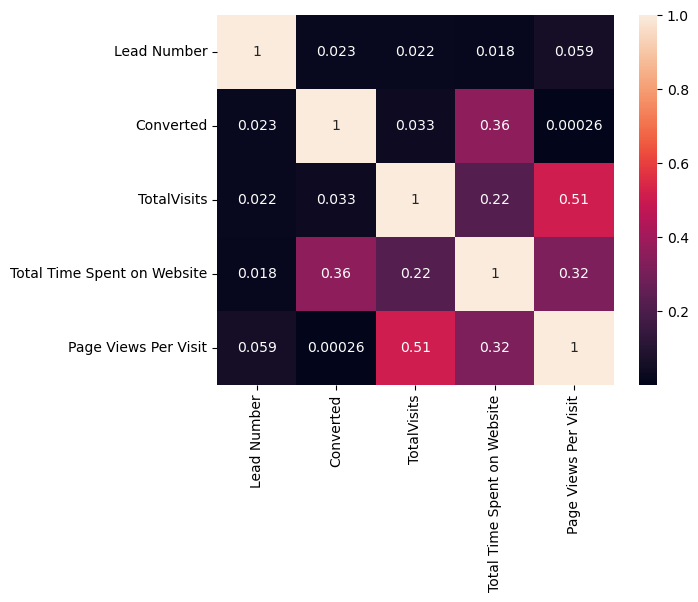

In [176]:
# plotting the heatmap for correlation
sns.heatmap(lead_data.corr(), annot=True)

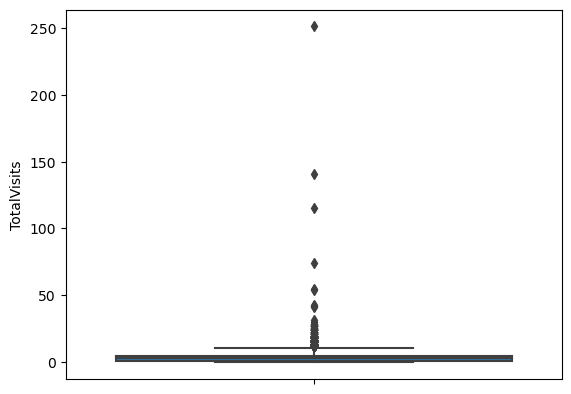

In [177]:
# Performing outlier analysis for Total visits
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [178]:
# Getting the different quantile values for TotalVisits
lead_data['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [187]:
#Outlier treatment remove all values above 99% and below 1%
q99 = lead_data['TotalVisits'].quantile(0.99)

In [180]:
q99

17.0

In [182]:
lead_data.shape

(9074, 13)

In [183]:
#Outlier treatment remove all values above 99% and below 1%
lead_data = lead_data[(lead_data.TotalVisits) <= q99]

In [184]:
lead_data.shape

(8991, 13)

In [186]:
#Outlier treatment remove all values above 99% and below 1%
q01 = lead_data['TotalVisits'].quantile(0.01)

In [188]:
q01

0.0

In [189]:
#Outlier treatment remove all values above 99% and below 1%
lead_data = lead_data[(lead_data.TotalVisits) >= q01]

In [190]:
lead_data.shape

(8991, 13)

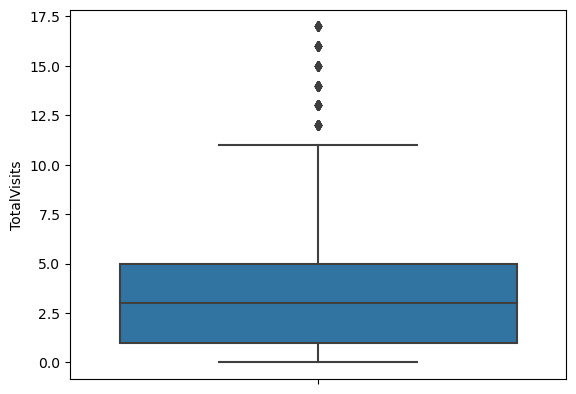

In [191]:
# Boxplot after teh treatment
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

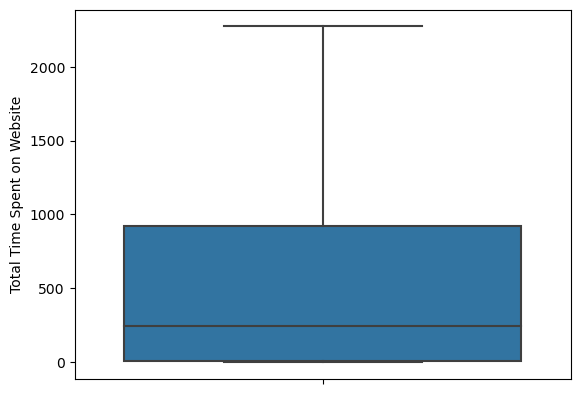

In [192]:
# Repeat outlier analysis and treatment for other variables
sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

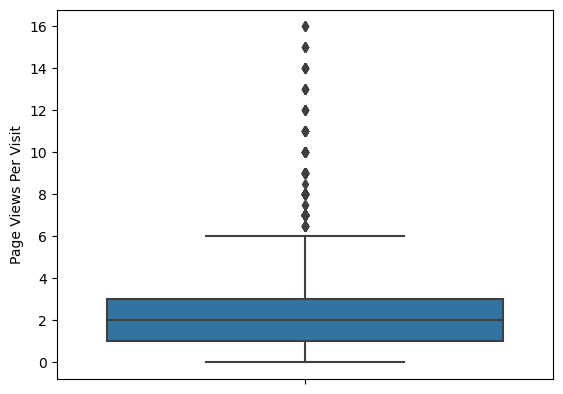

In [193]:
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [194]:
lead_data['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [195]:
#Outlier treatment remove all values above 99% and below 1%
q99 = lead_data['Page Views Per Visit'].quantile(0.99)

In [196]:
q01= lead_data['Page Views Per Visit'].quantile(0.01)

In [197]:
lead_data = lead_data[(lead_data['Page Views Per Visit']) <= q99]

In [198]:
lead_data.shape

(8924, 13)

In [199]:
lead_data = lead_data[(lead_data['Page Views Per Visit']) >= q01]

In [200]:
lead_data.shape

(8924, 13)

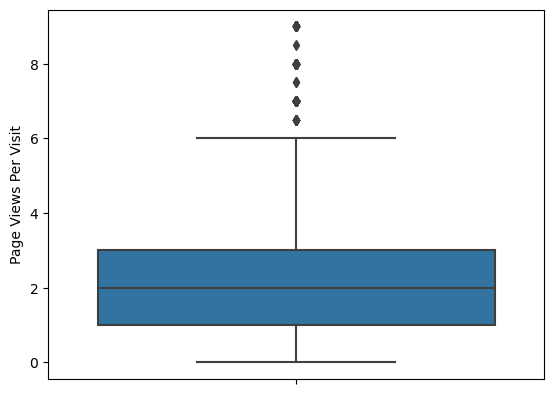

In [201]:
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [203]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [204]:
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [205]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Activity,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [206]:
# Get dummies
dummy = pd.get_dummies(lead_data[['Lead Origin', 'What is your current occupation']], drop_first=True)

In [207]:
lead_data = pd.concat([lead_data,dummy],1)

In [208]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           8924 non-null   object 
 1   Lead Number                                           8924 non-null   int64  
 2   Lead Origin                                           8924 non-null   object 
 3   Lead Source                                           8924 non-null   object 
 4   Do Not Email                                          8924 non-null   int64  
 5   Converted                                             8924 non-null   int64  
 6   TotalVisits                                           8924 non-null   float64
 7   Total Time Spent on Website                           8924 non-null   int64  
 8   Page Views Per Visit                                  8924

In [209]:
ls = pd.get_dummies(lead_data['Lead Source'],prefix = 'LSource')

In [210]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   LSource_Direct Traffic    8924 non-null   uint8
 1   LSource_Google            8924 non-null   uint8
 2   LSource_Olark Chat        8924 non-null   uint8
 3   LSource_Organic Search    8924 non-null   uint8
 4   LSource_Other Sources     8924 non-null   uint8
 5   LSource_Reference         8924 non-null   uint8
 6   LSource_Referral Sites    8924 non-null   uint8
 7   LSource_Welingak Website  8924 non-null   uint8
dtypes: uint8(8)
memory usage: 139.4 KB


In [211]:
# Since dummies are needed are n-1 levels and hence dropping one i.e. Others
ls.drop(columns = ['LSource_Other Sources'], inplace=True)

In [212]:
lead_data = pd.concat([lead_data,ls], axis=1)

In [213]:
la = pd.get_dummies(lead_data['Last Activity'],prefix = 'LastAct')

In [214]:
la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   LastAct_Converted to Lead          8924 non-null   uint8
 1   LastAct_Email Bounced              8924 non-null   uint8
 2   LastAct_Email Link Clicked         8924 non-null   uint8
 3   LastAct_Email Opened               8924 non-null   uint8
 4   LastAct_Form Submitted on Website  8924 non-null   uint8
 5   LastAct_Olark Chat Conversation    8924 non-null   uint8
 6   LastAct_Other Activity             8924 non-null   uint8
 7   LastAct_Page Visited on Website    8924 non-null   uint8
 8   LastAct_SMS Sent                   8924 non-null   uint8
dtypes: uint8(9)
memory usage: 148.2 KB


In [215]:
# Since dummies are needed are n-1 levels and hence dropping one i.e. Others
la.drop(columns= ['LastAct_Other Activity'], inplace=True)

In [217]:
lead_data = pd.concat([lead_data,la],axis=1)

In [219]:
lna = pd.get_dummies(lead_data['Last Notable Activity'],prefix = 'LastNotAct')

In [220]:
lna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   LastNotAct_Email Link Clicked       8924 non-null   uint8
 1   LastNotAct_Email Opened             8924 non-null   uint8
 2   LastNotAct_Modified                 8924 non-null   uint8
 3   LastNotAct_Olark Chat Conversation  8924 non-null   uint8
 4   LastNotAct_Other LNA                8924 non-null   uint8
 5   LastNotAct_Page Visited on Website  8924 non-null   uint8
 6   LastNotAct_SMS Sent                 8924 non-null   uint8
dtypes: uint8(7)
memory usage: 130.7 KB


In [222]:
# Since dummies are needed are n-1 levels and hence dropping one i.e. Others
lna.drop(columns= ['LastNotAct_Other LNA'], inplace=True)

In [223]:
lead_data = pd.concat([lead_data,lna], axis=1)

In [224]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,LastAct_Form Submitted on Website,LastAct_Olark Chat Conversation,LastAct_Page Visited on Website,LastAct_SMS Sent,LastNotAct_Email Link Clicked,LastNotAct_Email Opened,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Activity,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,1,0,0,0


In [225]:
# We have created dummies for the below variables, so we can drop them
lead_data.drop(columns = ['Lead Origin', 'What is your current occupation','Lead Source', 'Last Activity', 'Last Notable Activity'], inplace=True)

In [226]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           8924 non-null   object 
 1   Lead Number                                           8924 non-null   int64  
 2   Do Not Email                                          8924 non-null   int64  
 3   Converted                                             8924 non-null   int64  
 4   TotalVisits                                           8924 non-null   float64
 5   Total Time Spent on Website                           8924 non-null   int64  
 6   Page Views Per Visit                                  8924 non-null   float64
 7   A free copy of Mastering The Interview                8924 non-null   int64  
 8   Lead Origin_Landing Page Submission                   8924

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

In [229]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,LastAct_Form Submitted on Website,LastAct_Olark Chat Conversation,LastAct_Page Visited on Website,LastAct_SMS Sent,LastNotAct_Email Link Clicked,LastNotAct_Email Opened,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [230]:
y = lead_data['Converted']

In [231]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [232]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
# Scaling the continous variables
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,LastAct_Form Submitted on Website,LastAct_Olark Chat Conversation,LastAct_Page Visited on Website,LastAct_SMS Sent,LastNotAct_Email Link Clicked,LastNotAct_Email Opened,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_SMS Sent
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6138,0,0.297929,0.609686,0.926758,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [236]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.75212909009413

In [239]:
X_train.shape

(6246, 34)

In [242]:
# Applying RFE for feature selection
logreg = LogisticRegression()

In [247]:
rfe = RFE(logreg, n_features_to_select=15)  # running RFE with 15 variables as output

In [248]:
rfe = rfe.fit(X_train, y_train)

In [249]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False])

In [250]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 17),
 ('What is your current occupation_Student', False, 5),
 ('What is your current occupation_Unemployed', False, 4),
 ('What is your current occupation_Working Professional', True, 1),
 ('LSource_Direct Traffic', False, 10),
 ('LSource_Google', False, 15),
 ('LSource_Olark Chat', True, 1),
 ('LSource_Organic Search', False, 14),
 ('LSource_Reference', False, 2),
 ('LSource_Referral Sites', False, 13),
 ('LSource_Welingak Website', True, 1),
 ('LastAct_Converted to Lead', True, 1),
 ('LastAct_Email Bounced', True, 1),
 ('LastAct_Email Link Clicked', False, 

In [260]:
# Getting the selected variables or features
col = X_train.columns[rfe.support_]

In [261]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'LSource_Direct Traffic',
       'LSource_Google', 'LSource_Organic Search', 'LSource_Reference',
       'LSource_Referral Sites', 'LastAct_Email Link Clicked',
       'LastAct_Email Opened', 'LastAct_Form Submitted on Website',
       'LastAct_Page Visited on Website', 'LastAct_SMS Sent',
       'LastNotAct_SMS Sent'],
      dtype='object')

In [262]:
# Building Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.7
Date:                Mon, 22 May 2023   Deviance:                       5183.4
Time:                        01:01:19   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2425      0.070      3.467      0.001       0.105       0.380
Do Not Email                                            -1.5576      0.206     -7.557      0.000      -1.962      -1.154
Total Time Spent on Website                              1.1117      0.041     27.428      0.000       1.032       1.191
Lead Origin_Lead Add Form                                3.9026      0.226     17.303      0.000       3.460       4.345
What is your current occupation_Housewife               23.1591   1.71e+04      0.001      0.999   -3.35e+04    3.35e+04
What is your current occupation_Working Professional     2.7182      0.188     14.478      0.000       2.350       3.086
LSource_Olark Chat                                       1.1450      0.103     11.154      0.000       0.944       1.346
LSource_Welingak Website                                 1.8754      0.758      2.476      0.013       0.391       3.360
LastAct_Converted to Lead                               -1.1665      0.228     -5.107      0.000      -1.614      -0.719
LastAct_Email Bounced                                   -1.3531      0.421     -3.218      0.001      -2.177      -0.529
LastAct_Olark Chat Conversation                         -1.4463      0.198     -7.307      0.000      -1.834      -1.058
LastNotAct_Email Link Clicked                           -1.9344      0.256     -7.559      0.000      -2.436      -1.433
LastNotAct_Email Opened                                 -1.4976      0.088    -16.944      0.000      -1.671      -1.324
LastNotAct_Modified                                     -1.7200      0.101    -16.958      0.000      -1.919      -1.521
LastNotAct_Olark Chat Conversation                      -1.4977      0.367     -4.085      0.000      -2.216      -0.779
LastNotAct_Page Visited on Website                      -1.8374      0.204     -8.993      0.000      -2.238      -1.437
========================================================================================================================
"""

In [265]:
# p-value of What is your current occupation_Housewife is high and hence dropping it
col = col.drop('What is your current occupation_Housewife',1)

In [266]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'LSource_Olark Chat', 'LSource_Welingak Website',
       'LastAct_Converted to Lead', 'LastAct_Email Bounced',
       'LastAct_Olark Chat Conversation', 'LastNotAct_Email Link Clicked',
       'LastNotAct_Email Opened', 'LastNotAct_Modified',
       'LastNotAct_Olark Chat Conversation',
       'LastNotAct_Page Visited on Website'],
      dtype='object')

In [267]:
# Building Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.2
Date:                Mon, 22 May 2023   Deviance:                       5194.4
Time:                        01:02:57   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2436      0.070      3.483      0.000       0.107       0.381
Do Not Email                                            -1.5592      0.206     -7.566      0.000      -1.963      -1.155
Total Time Spent on Website                              1.1113      0.040     27.452      0.000       1.032       1.191
Lead Origin_Lead Add Form                                3.9045      0.225     17.324      0.000       3.463       4.346
What is your current occupation_Working Professional     2.7140      0.188     14.455      0.000       2.346       3.082
LSource_Olark Chat                                       1.1400      0.103     11.115      0.000       0.939       1.341
LSource_Welingak Website                                 1.8681      0.757      2.466      0.014       0.384       3.353
LastAct_Converted to Lead                               -1.1720      0.228     -5.132      0.000      -1.620      -0.724
LastAct_Email Bounced                                   -1.3536      0.420     -3.220      0.001      -2.178      -0.530
LastAct_Olark Chat Conversation                         -1.4491      0.198     -7.323      0.000      -1.837      -1.061
LastNotAct_Email Link Clicked                           -1.9336      0.256     -7.556      0.000      -2.435      -1.432
LastNotAct_Email Opened                                 -1.4906      0.088    -16.882      0.000      -1.664      -1.318
LastNotAct_Modified                                     -1.7149      0.101    -16.926      0.000      -1.913      -1.516
LastNotAct_Olark Chat Conversation                      -1.4927      0.367     -4.072      0.000      -2.211      -0.774
LastNotAct_Page Visited on Website                      -1.8375      0.204     -8.994      0.000      -2.238      -1.437
========================================================================================================================
"""

In [268]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,LastAct_Olark Chat Conversation,2.05
11,LastNotAct_Modified,1.94
0,Do Not Email,1.81
7,LastAct_Email Bounced,1.81
4,LSource_Olark Chat,1.66
2,Lead Origin_Lead Add Form,1.46
12,LastNotAct_Olark Chat Conversation,1.37
5,LSource_Welingak Website,1.29
6,LastAct_Converted to Lead,1.26
1,Total Time Spent on Website,1.23


In [269]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.575425
6138    0.715281
8650    0.941410
3423    0.059715
6552    0.252898
1696    0.069270
2110    0.903679
6830    0.010151
2581    0.330804
5927    0.079852
dtype: float64

In [270]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.57542536, 0.7152814 , 0.9414098 , 0.05971525, 0.25289826,
       0.06926985, 0.9036795 , 0.0101509 , 0.33080401, 0.0798523 ])

In [273]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.575425,6676
1,1,0.715281,6138
2,1,0.941410,8650
3,0,0.059715,3423
4,0,0.252898,6552


In [276]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.575425,6676,1
1,1,0.715281,6138,1
2,1,0.941410,8650,1
3,0,0.059715,3423,0
4,0,0.252898,6552,0


In [278]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3412  459]
 [ 708 1667]]


In [280]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8131604226705091


In [281]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [282]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7018947368421052

In [283]:
# Let us calculate specificity
TN / float(TN+FP)

0.8814259881167656

In [284]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11857401188323431


In [285]:
# positive predictive value 
print (TP / float(TP+FP))

0.784101599247413


In [286]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8281553398058252


In [287]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [289]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

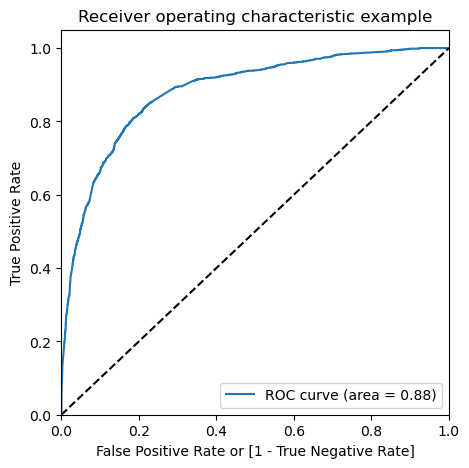

In [290]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [291]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [292]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.575425,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.715281,6138,1,1,1,1,1,1,1,1,1,0,0
2,1,0.941410,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.059715,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.252898,6552,0,1,1,1,0,0,0,0,0,0,0


In [293]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.581172  0.970947  0.342030
0.2   0.2  0.749600  0.914526  0.648411
0.3   0.3  0.804835  0.839579  0.783518
0.4   0.4  0.815882  0.780632  0.837510
0.5   0.5  0.813160  0.701895  0.881426
0.6   0.6  0.808678  0.630737  0.917851
0.7   0.7  0.781140  0.503579  0.951434
0.8   0.8  0.759846  0.417263  0.970034
0.9   0.9  0.713096  0.265263  0.987858


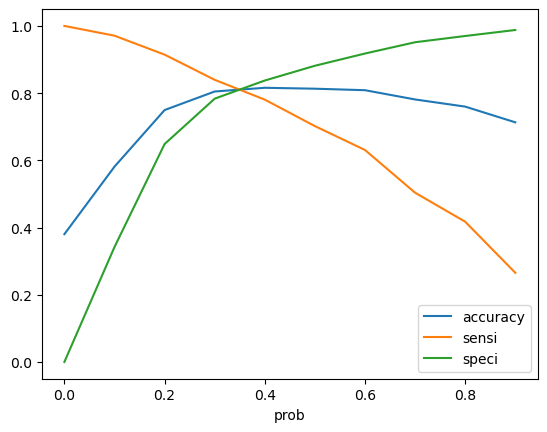

In [294]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [295]:
# applying the optimal cut off of 0.3 and predicting the final converted values
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.575425,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.715281,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.941410,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.059715,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.252898,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [297]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8048350944604546

In [298]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3033,  838],
       [ 381, 1994]], dtype=int64)

In [299]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [300]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8395789473684211

In [301]:
# Let us calculate specificity
TN / float(TN+FP)

0.783518470679411

In [302]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.216481529320589


In [303]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7040960451977402


In [304]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8884007029876977


In [306]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.784101599247413

In [307]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7018947368421052

In [309]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    0
 6243    0
 6244    1
 6245    0
 Name: predicted, Length: 6246, dtype: int64)

In [310]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

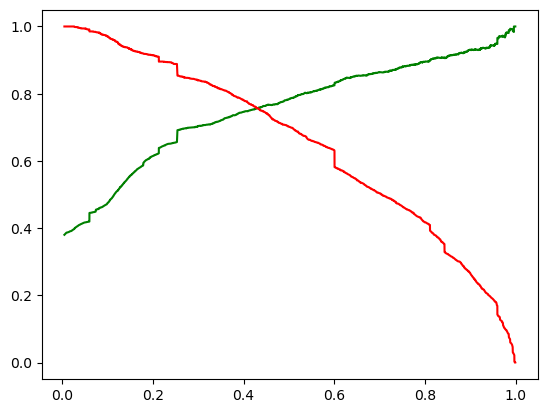

In [311]:
# this is the precision recall curve which could be used in place of ROC curve. We are not using this but the ROC curve to dtermine the optimal cut off
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [312]:
# Now getting the predictions for the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,LSource_Olark Chat,LSource_Welingak Website,LastAct_Converted to Lead,LastAct_Email Bounced,LastAct_Olark Chat Conversation,LastNotAct_Email Link Clicked,LastNotAct_Email Opened,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website
7625,0,2.077703,0,0,0,0,0,0,0,0,1,0,0,0
5207,0,0.739164,0,0,0,0,0,0,0,0,1,0,0,0
2390,0,-0.878390,1,0,0,0,0,0,0,0,0,0,0,0
4362,0,-0.455310,0,0,0,0,0,0,0,0,0,0,0,0
1023,0,-0.300302,0,0,0,0,0,0,0,0,1,0,0,0


In [313]:
X_test_sm = sm.add_constant(X_test)

In [314]:
y_test_pred = res.predict(X_test_sm)

In [315]:
y_test_pred[:10]

7625    0.743068
5207    0.395187
2390    0.959765
4362    0.434782
1023    0.170692
8226    0.595588
3079    0.134623
530     0.182475
7873    0.059715
5146    0.813731
dtype: float64

In [316]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [317]:
# Let's see the head
y_pred_1.head()

,0
7625,0.743068
5207,0.395187
2390,0.959765
4362,0.434782
1023,0.170692


In [318]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [319]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [320]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [321]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [322]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.743068
1,1,5207,0.395187
2,1,2390,0.959765
3,0,4362,0.434782
4,0,1023,0.170692


In [323]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [325]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [326]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7625,0,0.743068
1,5207,1,0.395187
2,2390,1,0.959765
3,4362,0,0.434782
4,1023,0,0.170692


In [328]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [329]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,7625,0,0.743068,1
1,5207,1,0.395187,1
2,2390,1,0.959765,1
3,4362,0,0.434782,1
4,1023,0,0.170692,0


In [330]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7923823749066468

In [332]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1298,  386],
       [ 170,  824]], dtype=int64)

In [333]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [334]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8289738430583501

In [335]:
# Let us calculate specificity
TN / float(TN+FP)

0.7707838479809976

In [337]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6809917355371901

In [338]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8289738430583501